In [1]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

/tmp/ipykernel_7152/47578708.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [2]:
import torch
print(f"Using torch version {torch.__version__}")

Using torch version 1.10.0


### Working with tensors

In [3]:
x = torch.Tensor(2,3,4) # pass in desired shape
print(x)

tensor([[[7.4897e+31, 2.7693e+32, 1.1077e+33, 4.4310e+33],
         [1.7724e+34, 7.5770e-22, 9.4790e-39, 5.9633e-38],
         [9.2420e-41, 2.5070e+14, 3.0826e+35, 1.3573e-40]],

        [[1.0028e+15, 4.9323e+36, 1.3644e-40, 4.0110e+15],
         [1.2155e-38, 6.6107e+19, 4.7663e+36, 7.2449e+37],
         [6.4177e+16, 1.2155e-38, 6.6109e+19, 4.7665e+36]]])


In [4]:
# create a tensor from a nested list
x = torch.tensor([[1,2],[3,4]])
print(x)

tensor([[1, 2],
        [3, 4]])


In [5]:
# create a tensor with random values between 0 and 1 with shape (2,3,4)
x = torch.rand(2,3,4)
print(x)

tensor([[[0.3610, 0.5050, 0.3316, 0.3729],
         [0.5320, 0.1670, 0.9698, 0.9355],
         [0.1708, 0.3578, 0.1162, 0.7905]],

        [[0.3943, 0.6544, 0.0515, 0.4718],
         [0.7323, 0.6939, 0.4504, 0.2657],
         [0.5988, 0.1892, 0.9514, 0.5854]]])


In [6]:
# to obtain the shape of the tensor is the same as in numpy
shape = x.shape
print(f"shape = {shape}")

size = x.size() # notice how this is a function rather than a property
print(f"size = {size}")

shape = torch.Size([2, 3, 4])
size = torch.Size([2, 3, 4])


In [7]:
"""
    Tensor to Numpy and Numpy to tensor
"""

tensor = torch.arange(4) 
np_arr = tensor.cpu().numpy() # requires the tensor to be on the CPU first

print(f"Pytorch tensor = {tensor}")
print(f"Numpy array = {np_arr}")

Pytorch tensor = tensor([0, 1, 2, 3])
Numpy array = [0 1 2 3]


### Operations on tensors
Most common operations that exist in numpy also exist in torch

In [8]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)
y = x1 + x2
print(f"X1 : {x1}")
print(f"X2 : {x2}")
print(f"Y  : {y}")

# in place operations are marked with a _ postfix i.e. add_
y = x2.add_(x1)
print(f"New x2: {x2}")

X1 : tensor([[0.9685, 0.0012, 0.1982],
        [0.7946, 0.4614, 0.0557]])
X2 : tensor([[0.3752, 0.5633, 0.9924],
        [0.8887, 0.8088, 0.0933]])
Y  : tensor([[1.3437, 0.5645, 1.1906],
        [1.6833, 1.2702, 0.1491]])
New x2: tensor([[1.3437, 0.5645, 1.1906],
        [1.6833, 1.2702, 0.1491]])


In [9]:
x = torch.arange(6)
print(f"x: {x}")

x = x.view(2,3) # changing the shape of the tensor
print(f"x: {x}")

x = x.permute(1,0) # swap dimension 0 and 1
print(f"x: {x}")



x: tensor([0, 1, 2, 3, 4, 5])
x: tensor([[0, 1, 2],
        [3, 4, 5]])
x: tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [10]:
x = torch.arange(6).view(2,3)
W = torch.arange(9).view(3,3)
print(f"x: {x}")
print(f"W: {W}")

h = torch.matmul(x,W)
print(f"h: {h}")


x: tensor([[0, 1, 2],
        [3, 4, 5]])
W: tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h: tensor([[15, 18, 21],
        [42, 54, 66]])


In [11]:
# indexing in torch is exactly the same as in numpy...no need to write code for this

### Dynamic Computation Graph and Backprop

In [12]:
x = torch.ones((3,)) # by default no gradient is computed
print(x.requires_grad)

x.requires_grad_()
print(x.requires_grad)

False
True


In [13]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print(f"x: {x}")

y = ((x+2)**2 + 3).mean()
print(f"y: {y}")

y.backward()

print(x.grad) # display dy/dx1, dy/dx2, and dy/dx3

x: tensor([0., 1., 2.], requires_grad=True)
y: 12.666666984558105
tensor([1.3333, 2.0000, 2.6667])


### GPU Support

In [14]:
gpu_avail = torch.cuda.is_available()
print(f"GPU available: {gpu_avail}")

# specify the device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Device: {device}")

# create a tensor and push it to the device
x = torch.zeros(2,3)
x = x.to(device)
print(f"x: {x}")

GPU available: True
Device: cuda
x: tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [15]:
# compare runtime for large matrix multiplication

x = torch.rand(5000,5000)

## CPU
start_time = time.time()
_ = torch.matmul(x,x)
end_time = time.time()
print(f"CPU computation time = {end_time - start_time:.6f} seconds")

## GPU
x = x.to(device)
# CUDA is asynchronous so different timing functions needed
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
_ = torch.matmul(x,x)
end.record()
torch.cuda.synchronize() # wait for everything to finish on GPU
print(f"GPU computation time = {0.001 * start.elapsed_time(end):.6f} seconds")
# NOTE: for some reason, GPU is slower than CPU on wsl2

CPU computation time = 0.557639 seconds
GPU computation time = 1.013520 seconds


In [16]:
# setting seed for GPU
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# some operations on GPU implemented stochastically for efficiency
# ensure all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Learning by example: Continuous XOR

#### Building modules

In [17]:
import torch.nn as nn 
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # init modules to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
    
    def forward(self, x):
        x = self.linear2(self.act_fn(self.linear1(x)))
        return x

In [18]:
# for binary classification, will use a single output neuron
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [19]:
# print the parameters of the module
for name, param in model.named_parameters():
    print(f"Parameter = {name}, shape = {param.shape}") 
    # each linear layer has shape [output, input]

Parameter = linear1.weight, shape = torch.Size([4, 2])
Parameter = linear1.bias, shape = torch.Size([4])
Parameter = linear2.weight, shape = torch.Size([1, 4])
Parameter = linear2.bias, shape = torch.Size([1])


#### Loading data

In [22]:
import torch.utils.data as data
# standard interface for handling data: data.Dataset and data.DataLoader

# to specify a dataset class, specify two functions: __getitem__ and __len__

class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_cont_xor()
    
    def generate_cont_xor(self) -> None:
        """
            Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1.
            The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
            If x=y, the label is 0
        """
        self.data = torch.randint(low=0, high=2, size=(self.size,2), dtype=torch.float32)
        self.label = (self.data.sum(dim=1) == 1).to(torch.long)
        # add some gaussian noise to the data points
        self.data += self.std * torch.randn(self.data.shape)

    def __len__(self) -> int:
        return self.size

    def __getitem__(self, idx) -> tuple:
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label


In [23]:
dataset = XORDataset(size=200)
print(f"Size of dataset = {len(dataset)}") # calls __len__
print(f"Data point 0 = {dataset[0]}") # calls __getitem__

Size of dataset = 200
Data point 0 = (tensor([ 0.0643, -0.0530]), tensor(0))


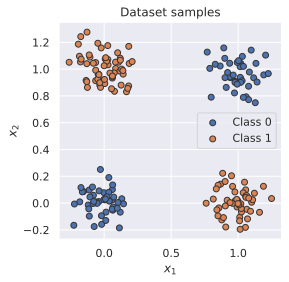

In [24]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(dataset.data, dataset.label)
plt.show()

#### Data Loaders
The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support <br> 
for automatic batching, multi-process data loading and many more features.

In [25]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
data_inputs, data_labels = next(iter(data_loader))

# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.9783,  0.9086],
        [ 0.1399,  0.9892],
        [ 1.1887,  0.1254],
        [ 0.1198,  1.0817],
        [ 0.8902, -0.1081],
        [-0.0204, -0.0944],
        [ 0.0643, -0.0530],
        [ 1.0836,  0.9783]])
Data labels torch.Size([8]) 
 tensor([0, 1, 1, 1, 1, 0, 0, 0])


### Optimization

#### Loss Modules & SGD

In [26]:
loss_module = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#### Training

In [27]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [28]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [35]:
def train(model, optimizer, data_loader, loss_module, num_epochs=100):
    # set the model to train mode
    model.train()

    # training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # move input data to GPU
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
        
            preds = model(data_inputs)
            preds = preds.squeeze(1) # preds are of size (batch_dim, 1)

            loss = loss_module(preds, data_labels.float())

            optimizer.zero_grad() # clear out residual gradients

            loss.backward() # back prop

            optimizer.step() # update params/weights



train(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

#### Saving a model

In [37]:
state_dict = model.state_dict()
print(state_dict)

torch.save(state_dict, "model_tutorial_1.tar")

OrderedDict([('linear1.weight', tensor([[ 2.1014,  2.1159],
        [-2.5325,  3.3341],
        [-0.6571,  1.7471],
        [ 3.8447, -3.1963]], device='cuda:0')), ('linear1.bias', tensor([-0.3405,  0.9643, -0.1047,  1.3284], device='cuda:0')), ('linear2.weight', tensor([[ 3.6010, -4.4790, -1.5423, -5.4740]], device='cuda:0')), ('linear2.bias', tensor([2.1709], device='cuda:0'))])


In [39]:
# load the state from a previously saved model
state_dict = torch.load("model_tutorial_1.tar")

new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# verify the params are the same
print("Original model\n", model.state_dict())
print("Loaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 2.1014,  2.1159],
        [-2.5325,  3.3341],
        [-0.6571,  1.7471],
        [ 3.8447, -3.1963]], device='cuda:0')), ('linear1.bias', tensor([-0.3405,  0.9643, -0.1047,  1.3284], device='cuda:0')), ('linear2.weight', tensor([[ 3.6010, -4.4790, -1.5423, -5.4740]], device='cuda:0')), ('linear2.bias', tensor([2.1709], device='cuda:0'))])
Loaded model
 OrderedDict([('linear1.weight', tensor([[ 2.1014,  2.1159],
        [-2.5325,  3.3341],
        [-0.6571,  1.7471],
        [ 3.8447, -3.1963]])), ('linear1.bias', tensor([-0.3405,  0.9643, -0.1047,  1.3284])), ('linear2.weight', tensor([[ 3.6010, -4.4790, -1.5423, -5.4740]])), ('linear2.bias', tensor([2.1709]))])


#### Evaluation

In [41]:
test_data_set = XORDataset(size=500)
test_data_loader = data.DataLoader(test_data_set, batch_size=128, shuffle=False, drop_last=False)

# will use accuracy as a metric (TP+TN)/(TP+TN+FP+FN)

def eval(model, data_loader):
    model.eval() # eval mode = no gradient updates
    true_preds, num_preds = 0, 0

    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            # map the prediction between 0 and 1
            preds = torch.sigmoid(preds)
            pred_labels = (preds >= 0.5).long() # make preds binary

            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
    
    acc = true_preds / num_preds
    print(f"Accuracy = {acc*100:.2f}%")

eval(model, test_data_loader)

Accuracy = 100.00%


#### Visualize classification boundaries

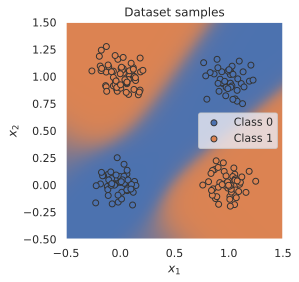

In [43]:
@torch.no_grad() # decorator with same effect as with torch.no_grad()
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # make use of operations learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
     # specifying None in a new dimensions creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = output_image.cpu().numpy()
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

#### Tensorboard Logging

In [44]:
from torch.utils.tensorboard import SummaryWriter

# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard

In [45]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Create TensorBoard logger
    writer = SummaryWriter(logging_dir)
    model_plotted = False

    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # For the very first batch, we visualize the computation graph in TensorBoard
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)

        # Visualize prediction and add figure to TensorBoard
        # Since matplotlib figures can be slow in rendering, we only do it every 10th epoch
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)

    writer.close()

In [46]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_data_loader, loss_module, val_dataset=dataset)

  0%|          | 0/100 [00:00<?, ?it/s]

In [47]:
%tensorboard --logdir runs/our_experiment